In [130]:
from tabulate import tabulate
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
'''
FONTOS: Az első feladatáltal visszaadott DataFrame-et kell használni a további feladatokhoz. 
A függvényeken belül mindig készíts egy másolatot a bemenő df-ről, (new_df = df.copy() és ezzel dolgozz tovább.)
'''

In [ ]:
'''
Készíts egy függvényt, ami egy string útvonalat vár paraméterként, és egy DataFrame ad visszatérési értékként.

Egy példa a bemenetre: 'test_data.csv'
Egy példa a kimenetre: df_data
return type: pandas.core.frame.DataFrame
függvény neve: csv_to_df
'''

In [2]:
def csv_to_df(path: str) -> pd.core.frame.DataFrame:
    return pd.read_csv(path)
df = csv_to_df('/Users/banoczymartin/Library/Mobile Documents/com~apple~CloudDocs/OE/4/bevadat/lab/BEVADAT2022232/HAZI/HAZI04/StudentsPerformance.csv')
#print(df)

In [ ]:
'''
Készíts egy függvényt, ami egy DataFrame-et vár paraméterként, 
és átalakítja azoknak az oszlopoknak a nevét nagybetűsre amelyiknek neve nem tartalmaz 'e' betüt.

Egy példa a bemenetre: df_data
Egy példa a kimenetre: df_data_capitalized
return type: pandas.core.frame.DataFrame
függvény neve: capitalize_columns
'''

In [30]:
def capitalize_columns(df_data: pd.DataFrame) -> pd.core.frame.DataFrame:
    newdf=df_data.copy()
    newdf.columns = [col.upper() if 'e' not in col else col for col in newdf.columns]
    return newdf
print(capitalize_columns(df).to_markdown())

|     | gender   | race/ethnicity   | parental level of education   | LUNCH        | test preparation course   |   math score |   reading score |   writing score |
|----:|:---------|:-----------------|:------------------------------|:-------------|:--------------------------|-------------:|----------------:|----------------:|
|   0 | female   | group B          | bachelor's degree             | standard     | none                      |           72 |              72 |              74 |
|   1 | female   | group C          | some college                  | standard     | completed                 |           69 |              90 |              88 |
|   2 | female   | group B          | master's degree               | standard     | none                      |           90 |              95 |              93 |
|   3 | male     | group A          | associate's degree            | free/reduced | none                      |           47 |              57 |              44 |
|   4 | male    

In [ ]:
'''
Készíts egy függvényt, ahol egy szám formájában vissza adjuk, hogy hány darab diáknak sikerült teljesíteni a matek vizsgát.
(legyen az átmenő ponthatár 50).

Egy példa a bemenetre: df_data
Egy példa a kimenetre: 5
return type: int
függvény neve: math_passed_count
'''

In [26]:
def math_passed_count(df_data) -> int:
    newdf=df_data.copy()
    return (newdf.loc[np.where(newdf['math score']>50)]).shape[0]
print(math_passed_count(df))

850


In [ ]:
'''
Készíts egy függvényt, ahol Dataframe ként vissza adjuk azoknak a diákoknak az adatait (sorokat), akik végeztek előzetes gyakorló kurzust.

Egy példa a bemenetre: df_data
Egy példa a kimenetre: df_did_pre_course
return type: pandas.core.frame.DataFrame
függvény neve: did_pre_course
'''

In [29]:
def did_pre_course(df_data) -> pd.core.frame.DataFrame:
    newdf=df_data.copy()
    return newdf[newdf['test preparation course'] != 'none']
print(did_pre_course(df).to_markdown())

|     | gender   | race/ethnicity   | parental level of education   | lunch        | test preparation course   |   math score |   reading score |   writing score |
|----:|:---------|:-----------------|:------------------------------|:-------------|:--------------------------|-------------:|----------------:|----------------:|
|   1 | female   | group C          | some college                  | standard     | completed                 |           69 |              90 |              88 |
|   6 | female   | group B          | some college                  | standard     | completed                 |           88 |              95 |              92 |
|   8 | male     | group D          | high school                   | free/reduced | completed                 |           64 |              64 |              67 |
|  13 | male     | group A          | some college                  | standard     | completed                 |           78 |              72 |              70 |
|  18 | male    

In [ ]:
'''
Készíts egy függvényt, ahol a bemeneti Dataframet a diákok szülei végzettségi szintjei alapján csoportosításra kerül,
majd aggregációként vegyük, hogy átlagosan milyen pontszámot értek el a diákok a vizsgákon.

Egy példa a bemenetre: df_data
Egy példa a kimenetre: df_average_scores
return type: pandas.core.frame.DataFrame
függvény neve: average_scores
'''

In [58]:
def average_scores(df_data) -> pd.core.frame.DataFrame:
    return pd.DataFrame(df_data.copy()).groupby(['parental level of education']).mean()
    # df[['math score', 'reading score','writing score']].mean(axis=1)
print(average_scores(df).to_markdown())

| parental level of education   |   math score |   reading score |   writing score |
|:------------------------------|-------------:|----------------:|----------------:|
| associate's degree            |      67.8829 |         70.9279 |         69.8964 |
| bachelor's degree             |      69.3898 |         73      |         73.3814 |
| high school                   |      62.1378 |         64.7041 |         62.449  |
| master's degree               |      69.7458 |         75.3729 |         75.678  |
| some college                  |      67.1283 |         69.4602 |         68.8407 |
| some high school              |      63.4972 |         66.9385 |         64.8883 |


/var/folders/ms/lx6k291d71z8f387pwx9g8cm0000gn/T/ipykernel_1597/3450132761.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return pd.DataFrame(df_data.copy()).groupby(['parental level of education']).mean()


In [ ]:
'''
Készíts egy függvényt, ami a bementeti Dataframet kiegészíti egy 'age' oszloppal, töltsük fel random 18-66 év közötti értékekkel.
A random.randint() függvényt használd, a random sorsolás legyen seedleve, ennek értéke legyen 42.

Egy példa a bemenetre: df_data
Egy példa a kimenetre: df_data_with_age
return type: pandas.core.frame.DataFrame
függvény neve: add_age
'''

In [67]:
def add_age(df_data) -> pd.core.frame.DataFrame:
    newdf = df_data.copy()
    newdf['age']=np.random.randint(18,67,size=newdf.shape[0])
    return newdf
print(pd.DataFrame(add_age(df)).sort_values('age',ascending= False))

     gender race/ethnicity parental level of education         lunch  \
40     male        group C          associate's degree  free/reduced   
526    male        group C            some high school  free/reduced   
97   female        group E                some college      standard   
185    male        group C          associate's degree  free/reduced   
571    male        group A           bachelor's degree      standard   
..      ...            ...                         ...           ...   
306    male        group E                some college      standard   
35     male        group E          associate's degree      standard   
33     male        group D                some college      standard   
718  female        group C                 high school      standard   
75     male        group B          associate's degree  free/reduced   

    test preparation course  math score  reading score  writing score  age  
40                     none          55             61    

In [ ]:
'''
Készíts egy függvényt, ami vissza adja a legjobb teljesítményt elérő női diák pontszámait.

Egy példa a bemenetre: df_data
Egy példa a kimenetre: (99,99,99) #math score, reading score, writing score
return type: tuple
függvény neve: female_top_score
'''

In [114]:
def female_top_score(df_data) -> tuple:
    newdf=df_data.copy()
    newdf=df.loc[np.where(newdf['gender']=='female')]
    newdf['avg'] = newdf[['math score','reading score','writing score']].mean(axis=1)
    #newdf=newdf.drop('index',1)
    #list((newdf.sort_values('avg',ascending=False).head(1)).itertuples(index=True))
    return list((newdf.sort_values('avg',ascending=False).head(1))[['math score','reading score','writing score']].itertuples(index=False,name=None))[0]
print(female_top_score(df)) 

(100, 100, 100)


In [ ]:
'''
Készíts egy függvényt, ami a bementeti Dataframet kiegészíti egy 'grade' oszloppal. 
Számoljuk ki hogy a diákok hány százalékot ((math+reading+writing)/300) értek el a vizsgán, és osztályozzuk őket az alábbi szempontok szerint:

90-100%: A
80-90%: B
70-80%: C
60-70%: D
<60%: F

Egy példa a bemenetre: df_data
Egy példa a kimenetre: df_data_with_grade
return type: pandas.core.frame.DataFrame
függvény neve: add_grade
'''

In [118]:
def add_grade(df_data) -> pd.core.frame.DataFrame:
    newdf=df_data.copy()
    for i in range(len(newdf)):
        newcol = 100*(newdf['math score'][i]+newdf['reading score'][i]+newdf['writing score'][i])/300
        if newcol >= 90:
            newdf['grade'] = 'A'
        elif newcol >= 80:
            newdf['grade'] = 'B'
        elif newcol >= 70:
            newdf['grade'] = 'C'
        elif newcol >= 60:
            newdf['grade'] = 'D'
        else:
            newdf['grade'] = 'F'
    return newdf
print(add_grade(df).to_markdown())

|     | gender   | race/ethnicity   | parental level of education   | lunch        | test preparation course   |   math score |   reading score |   writing score | grade   |
|----:|:---------|:-----------------|:------------------------------|:-------------|:--------------------------|-------------:|----------------:|----------------:|:--------|
|   0 | female   | group B          | bachelor's degree             | standard     | none                      |           72 |              72 |              74 | B       |
|   1 | female   | group C          | some college                  | standard     | completed                 |           69 |              90 |              88 | B       |
|   2 | female   | group B          | master's degree               | standard     | none                      |           90 |              95 |              93 | B       |
|   3 | male     | group A          | associate's degree            | free/reduced | none                      |           47 |   

In [ ]:
'''
Készíts egy függvényt, ami a bemeneti Dataframe adatai alapján elkészít egy olyan oszlop diagrammot,
ami vizualizálja a nemek által elért átlagos matek pontszámot.

Oszlopdiagram címe legyen: 'Average Math Score by Gender'
Az x tengely címe legyen: 'Gender'
Az y tengely címe legyen: 'Math Score'

Egy példa a bemenetre: df_data
Egy példa a kimenetre: fig
return type: matplotlib.figure.Figure
függvény neve: math_bar_plot
'''

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (1000,) and arg 1 with shape (2,).

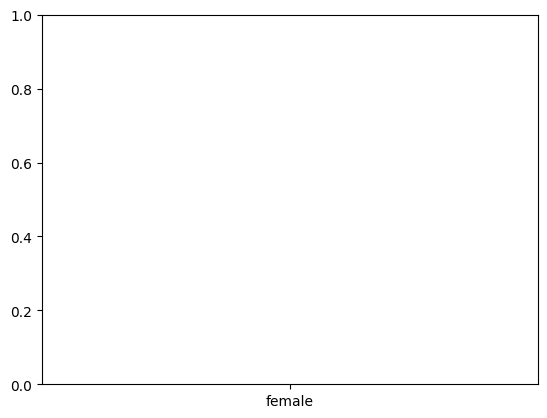

In [167]:
def math_bar_plot(df_data):
    #newdf = pd.DataFrame(df_data.copy().groupby(['gender'])['math score'].mean())
    newdf = df_data.copy()
    fig, ax=plt.subplots()
    ax.bar(newdf['gender'],pd.DataFrame(newdf.groupby(['gender'])['math score'].mean())['math score'])
    #ax.set_title = 'Average Math Score by Gender'
    #ax.set_xlabel = 'Gender'
    #ax.set_ylabel = 'Math Score'
    return fig
plt.show(math_bar_plot(df))
#print(math_bar_plot(df).to_markdown())

In [ ]:
''' 
Készíts egy függvényt, ami a bemeneti Dataframe adatai alapján elkészít egy olyan histogramot,
ami vizualizálja az elért írásbeli pontszámokat.

A histogram címe legyen: 'Distribution of Writing Scores'
Az x tengely címe legyen: 'Writing Score'
Az y tengely címe legyen: 'Number of Students'

Egy példa a bemenetre: df_data
Egy példa a kimenetre: fig
return type: matplotlib.figure.Figure
függvény neve: writing_hist
'''

In [ ]:
''' 
Készíts egy függvényt, ami a bemeneti Dataframe adatai alapján elkészít egy olyan kördiagramot,
ami vizualizálja a diákok etnikum csoportok szerinti eloszlását százalékosan.

Érdemes megszámolni a diákok számát, etnikum csoportonként,majd a százalékos kirajzolást az autopct='%1.1f%%' paraméterrel megadható.
Mindegyik kör szelethez tartozzon egy címke, ami a csoport nevét tartalmazza.
A diagram címe legyen: 'Proportion of Students by Race/Ethnicity'

Egy példa a bemenetre: df_data
Egy példa a kimenetre: fig
return type: matplotlib.figure.Figure
függvény neve: ethnicity_pie_chart
'''